# 多元非線性迴歸

## 載入測試資料

In [10]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=300, n_features=2, noise=50)

## 繪圖

Text(0.5, 0.92, '測試資料')

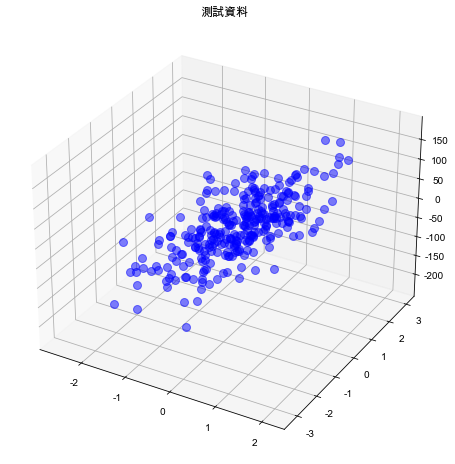

In [11]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

# 修正中文亂碼
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] 
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(X[:,0], X[:,1], y, 'o', markersize=8, color='blue', alpha=0.5)
plt.title('測試資料')

## 使用 PolynomialFeatures 產生多項式

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2) # 2 次方
X_new = poly.fit_transform(X) # 轉換
X_new.shape

(300, 6)

In [13]:
poly.get_feature_names_out(['x1', 'x2'])

array(['1', 'x1', 'x2', 'x1^2', 'x1 x2', 'x2^2'], dtype=object)

## 資料分割

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 6), (60, 6), (240,), (60,))

## 特徵縮放

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 模型訓練

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_std, y_train)
lr.coef_, lr.intercept_

(array([ 0.        , 68.4197381 ,  2.57455034,  2.72562102,  0.89029408,
        -5.36941076]),
 -6.099672544498523)

## 模型評分

In [17]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# R2、MSE、MAE
y_pred = lr.predict(X_test_std)
print(f'R2 = {r2_score(y_test, y_pred)*100:.2f}') 
print(f'MSE = {mean_squared_error(y_test, y_pred)}') 
print(f'MAE = {mean_absolute_error(y_test, y_pred)}') 

R2 = 52.87
MSE = 3155.4231199414303
MAE = 45.322099168462366


## 使用原始特徵的模型評分

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)
print(f'R2 = {r2_score(y_test, y_pred)*100:.2f}') 
print(f'MSE = {mean_squared_error(y_test, y_pred)}') 
print(f'MAE = {mean_absolute_error(y_test, y_pred)}') 

R2 = 65.35
MSE = 2369.6784172137873
MAE = 36.65096122653496
